# Frequenzmodulation

## Informationssignal

Das Informationssignal $u(t)$ sei ein Multisinussignal der Form
\begin{equation*}
    u(t) = \sum_{i=1}^n a_i \cdot \cos(\omega_i t + \varphi_i) \; .
\end{equation*}

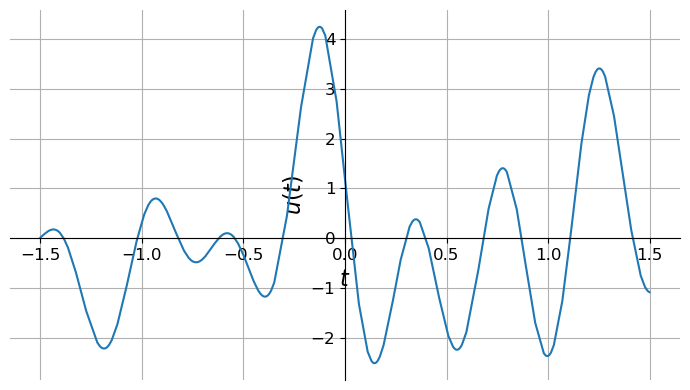

In [4]:
import numpy as np
from sympy import *
from scipy import signal
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=(7,4)
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['axes.grid']='True'
rcParams['axes.labelsize']='16'

# Trägerfrequenz
f_0 = 10.0
# Frequenzhub
DeltaF = 10.0
# Phasenhub
DeltaPhi = 1.0

t = var('t')
f = var('f')
index = np.linspace(0,4,5,dtype=int)

f_i = np.array([0.6, 1.0, 1.4, 2.0, 2.3])
a_i = np.array([1.0, 0.5, 1.2, -0.8, 1.3])
phi_i = np.array([1.0, 0.5, 1.2, -0.8, 1.3])

u = 0
for run in index:
    u = u + a_i[run] * cos(2*pi*f_i[run]*t+phi_i[run])
    
# Zeitintervall der Darstellung
t_min = -1.5
t_max = 1.5
plot(u, (t, t_min, t_max), ylabel='$u(t)$',axis_center=(0,0))

Das Spektrum $U(j \omega)$ lautet

\begin{equation*}
    U(j \omega) = \pi \cdot \sum_{i=1}^n a_i \cdot \left[ \delta(\omega - \omega_i) \cdot e^{j \varphi_i} + \delta(\omega + \omega_i) \cdot e^{- j \varphi_i} \right] \; .
\end{equation*}

Die folgende Abbildung illustriert das Betragsspektrum $|U(j \omega)|$ für das obige Zeitsignal. Dabei wird das Spektrum analytisch berechnet. Eine symbolische Berechnung mit sympy würde aufgrund er auftretenden Dirac-Impulse zu Problemen führen. Auch eine numerische Berechnung führt aufgrund von des Leck-Effektes der diskreten Fouriertransformation nicht zur exakten Lösung. Man erkennt im Spektrum die Paare von positiven und negativen Frequenzen $\pm f_i$ der Kosinus-Funktionen. Die Bandbreite ergibt sich für dieses spezielle Signal aus der maximalen Frequenz der Kosinussignale zu $B/2 = f_\max = 2.3$ Hz.

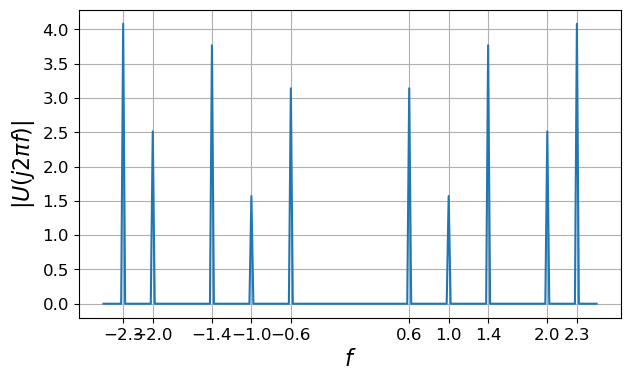

In [6]:
# Abbildung der Frequenzen auf ganzzahlige Werte
N_f = 50
f_int = np.around(f_i*N_f)
f_int = f_int.astype(int)

# Berechnung des Spektrums aus Dirac-Impulsen
U = 0
# cardinality of x axis
f_max = np.amax(f_int)
N_x = f_max * 2 + 1

for run in index:
    fplus = f_int[run]+f_max
    fminus = f_max-f_int[run]
    U = U + a_i[run]*( signal.unit_impulse(N_x,fplus)*exp(I*phi_i[run]) + signal.unit_impulse(N_x,fminus)*exp(-I*phi_i[run]) )

# aus Korrespondenz der Fourier-Transformation: cos(wt) --> pi (delta(w-w_0)+delta(w+w_0))
U = U * np.pi

N_margin = 10
Uplot = np.append(np.zeros((1,N_margin)), U)
Uplot = np.append(Uplot, np.zeros((1,N_margin)))


plt.plot(np.arange(-f_max-N_margin,f_max+N_margin+1)/N_f,abs(Uplot))
plt.xlabel('$f$')
plt.ylabel('$|U(j 2 \pi f)|$')
plt.xticks(np.append(-f_i,f_i))
plt.grid(True)

## Modulation 

Das Informationssignal $u(t)$ wird nun frequenzmoduliert mit der Trägerfrequenz $f_0$. Dies geschieht über

\begin{equation}
    x^{(FM)}(t) = \mathrm{Re} \left\{  e^{ j 2 \pi \Delta F \int_0^t u(\tau) d\tau}
            \cdot e^{j\omega_0 t} \right\}
         = \cos \left(  2 \pi \Delta F \int_0^t u(\tau) d\tau + \omega_0 t \right) \; .
\end{equation}

Für die Phasenmodulation gilt entsprechend

\begin{equation}
    x^{(PM)}(t) = \mathrm{Re} \left\{  e^{ j 2 \pi \Delta \Phi u(t)}
            \cdot e^{j\omega_0 t} \right\}
         = \cos \left(  2 \pi \Delta \Phi u(t) + \omega_0 t \right) \; .
\end{equation}

Für das betrachete Multi-Sinus-Signal kann kein Modulationsindex im klassischen Sinn angegeben werden, weil dieser nur für monofrequente Signale definiert ist. Der unten illustrierte zeitliche Verlauf zeigt die Informationssigal (rot) und das FM- bzw. das PM-modulierte Signal. Man erkennt die Abhängigkeit der Momentanfrequenz von $x(t)$ von der Momentanamplitude von $u(t)$, welche bei der PM um 90° verschoben ist. 

/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_50622/3148516574.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)


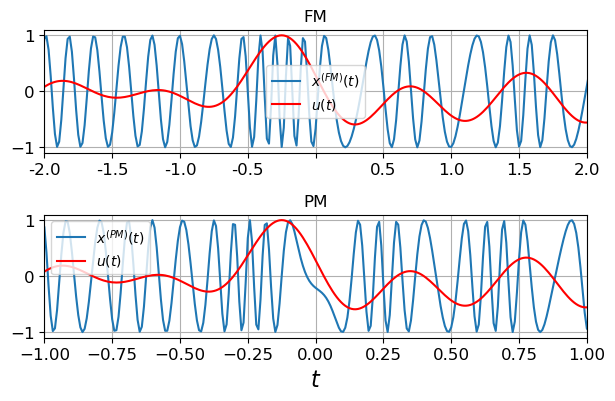

In [9]:
# --------------------------------------------------------------
# symbolische Berechnung über sympy funktioniert nicht sehr gut, 
# da Auswertung der analytischen Beschreibung nicht hoch genug
# auflöst. Daher manuelle Abtastung und Darstellung über numpy.
#
# Abtastung der FM- und PM-modulierten Zeitsignale
# ungefähre max. Frequenz des modulierten Signals 
# x 2 wegen Abtasttheorem von Shannon

# Abtastrate
f_a = 2**np.ceil(np.log2(2.0*(f_0+10.0*f_i[-1])))
# Abtastintervall
T_a = 1.0 / f_a
# Zeitvektor mit diskreten Abtastzeitpunkten
t_a = np.arange(t_min,t_max,T_a)
# Abtastinkrement
dt = t_a[1] - t_a[0]
# Anzahl Abtastwerte im Zeitinterval 
N_a = len(t_a)

# Abtastung
u_function = lambdify((t,), u, modules='numpy')
u_a = u_function(t_a)

# Normierung der maximalen Amplitude auf Eins
u_norm = u_a / np.amax(u_a)

# Frequenz- und Phasenmodulation
xFM = np.cos( 2 * np.pi * DeltaF * np.cumsum(u_norm)*dt + 2 * np.pi * f_0 * t_a) 
xPM = np.cos( 2 * np.pi * DeltaPhi * u_norm + 2 * np.pi * f_0 * t_a) 

fig = plt.figure()
plt.subplots_adjust(hspace=0.5)

ax = fig.add_subplot(211)
ax.plot(t_a,xFM,label='$x^{(FM)}(t)$')
ax.plot(t_a,u_norm,'r-',label='$u(t)$')
a = ax.get_xticks().tolist()
a[4] = ''
ax.set_xticklabels(a)
plt.title('FM')
plt.grid(True)
plt.xlim((-1.0,1.0))
plt.legend()

ax = fig.add_subplot(212)
ax.plot(t_a,xPM,label='$x^{(PM)}(t)$')
ax.plot(t_a,u_norm,'r-',label='$u(t)$')
plt.xlabel('$t$')
#plt.ylabel('$|X(j 2 \pi f)$|')
plt.title('PM')
plt.grid(True)
plt.xlim((-1.0,1.0))
plt.legend()

Das Spektrum von FM- und PM-modulierten Signalen kann aufgrund der Nichtlinearität der Winkelmodulationsverfahren nur für monofrequente Signale analytisch geschlossen ermittelt werden. Für das betrachtete Multisinussignal mit mehreren Frequenzen ist dies nicht möglich, weshalb das Spektrum nun numerisch über die FFT berechnet werden soll. Dabei ist zu beachten, dass der Leck-Effekt auftritt und keine einzelnen Dirac-Impulse zu beobachten sind.

Aus den unteren Bildern ist zu erkennen, dass die Bandbreite ca. 30 Hz beträgt, was deutlich mehr als eine Verdopplung bei der Zweiseitenbandmodulation ist. Für die größte Einzelfrequenz $f_i=2,3$ Hz und einem Frequenzhub von $\Delta F=10$ Hz beträgt die Carson Bandbreite $B_c = 29,2$ Hz. Mit der Trägerfrequenz $f_0=20$ Hz liegen die signifikanten Signalanteile damit zwischen 5,4 Hz und 34,6 Hz. Dies kann aber nur eine grobe Abschätzung für das Multi-Sinus-Signal sein.

/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_50622/3369371415.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)


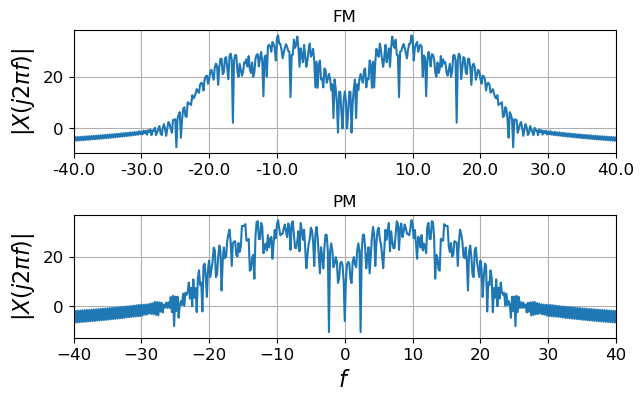

In [11]:
# Spektrum von FM- und PM-modulierten Signalen
N_FFT = N_a*2
XFM_s = np.fft.fftshift(np.fft.fft(xFM,N_FFT))
XPM_s = np.fft.fftshift(np.fft.fft(xPM,N_FFT))

# Frequenzachse
f_s = np.fft.fftshift(np.fft.fftfreq(N_FFT,dt))

fig = plt.figure()
plt.subplots_adjust(hspace=0.5)

ax = fig.add_subplot(211)
ax.plot(f_s,20*np.log10(np.abs(XFM_s)))
plt.ylabel('$|X(j 2 \pi f)$|')
plt.title('FM')
plt.xlim((-40.0,40.0))
a = ax.get_xticks().tolist()
a[4] = ''
ax.set_xticklabels(a)
plt.grid(True)

ax = fig.add_subplot(212)
ax.plot(f_s,20*np.log10(np.abs(XPM_s)))
plt.xlabel('$f$')
plt.ylabel('$|X(j 2 \pi f)$|')
plt.title('PM')
plt.xlim((-40.0,40.0))
plt.grid(True)
plt.show()
